# Introduction

The following paper aims to study and understand a heuristic model called *splitting 2-opt* that I have developed to find a suboptimal solution to the well-known millennium problem $\delta-TSP$, clearly inspired by the 2-opt heuristic.

Of course, this is not the only field of application that is feasible to be used and along the analysis performed it will be possible to understand its usefulness in other related problems, such as VRP, DNA sequencing, logistics, optimal circuit fabrication, etc... all with NP-Hard complexity where no exact method will give us a known answer in finite time.

Thus I intend to give a base-formulation together with the approximation algorithm (i.e. heuristics) with which to solve such a problem in a reasonable time.


---
Topics:

* Overview: $\delta$-symmetric Travelling salesman problem
* Graphs, distance matrix and complexity
* Brief description of the **local search** method
* Understanding 2-opt heuristic and triangle inequality
* Properties: simple polygons and polygonalization
* Greedy Nearest neighbour(GNN) method
* Implementing 2-opt and GNN in Cython
* My new hybrid-heuristic concept: **Splitting 2-opt heuristic**
* Splitting 2-opt Cython implementation
* Proof: solving a graph(circuit) with more than 30000 nodes
---

# $\delta$-symmetric travelling salesman problem

This problem aims to solve the following question.

Given a list of **N**-vertices and **E**-edges (which represent the Euclidean distance or weighting) we can define it as a graph in which we look for a path order which is the least cost possible. That is, it is a discrete optimization problem which seeks the most optimal or least cost path.

The following study tries to exploit a version of this problem, the symmetric delta-euclidean TSP, since its properties allow us to make use of this formulation using the symmetry and the Euclidean norm.

Being somewhat more rigorous, this model can be described by means of a complete weighted undirected graph $G(V, E)$.

The characteristics of this one are:
  * The "cities" represent the vertices of the graph.
  * The "roads" are the edges of the graph.
  * The distance of an edge is the weight given to it (in our case this will be determined by the Euclidean distance).
  * Completeness: Each pair of vertices is connected by only one edge and can be traversed only once.

The general distance metric to be used will be:

$d(p,q) = \sqrt{((p1 - q1)^2 + (p2 - q2)^2 + ... + (pn - qn)^2}$



**And the total objective function to minimize is (with a decompression I made on the formula):**

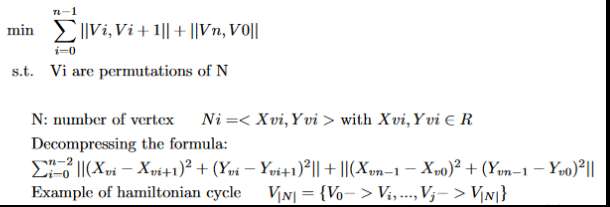

# Graphs, distance matrix and complexity

The definition of the type of graph used is sufficient for us to study a simple instance of the TSP problem, and with it its complications and limitations.

Using a distance matrix we can perfectly calculate and store the cost metrics of the graph (whether they are weights or Euclidean in our study). By the properties of symmetry this matrix can be represented as:


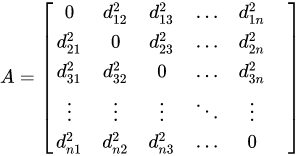

It is easy to notice that this matrix is square of dimension **NxN**, and by the symmetry property we can see how the diagonal of 0's (i.e. the distance of a vertex or node to itself) halves the number of possible solutions of the problem, and thus the computational complexity, since it is the same to say that $D(i,j) = D(j,i)$.

---

A very simple instance of the TSP is explained below in a complete graph of the form $V={\{1,2,3,4,4\}}$ with some multiple variants.

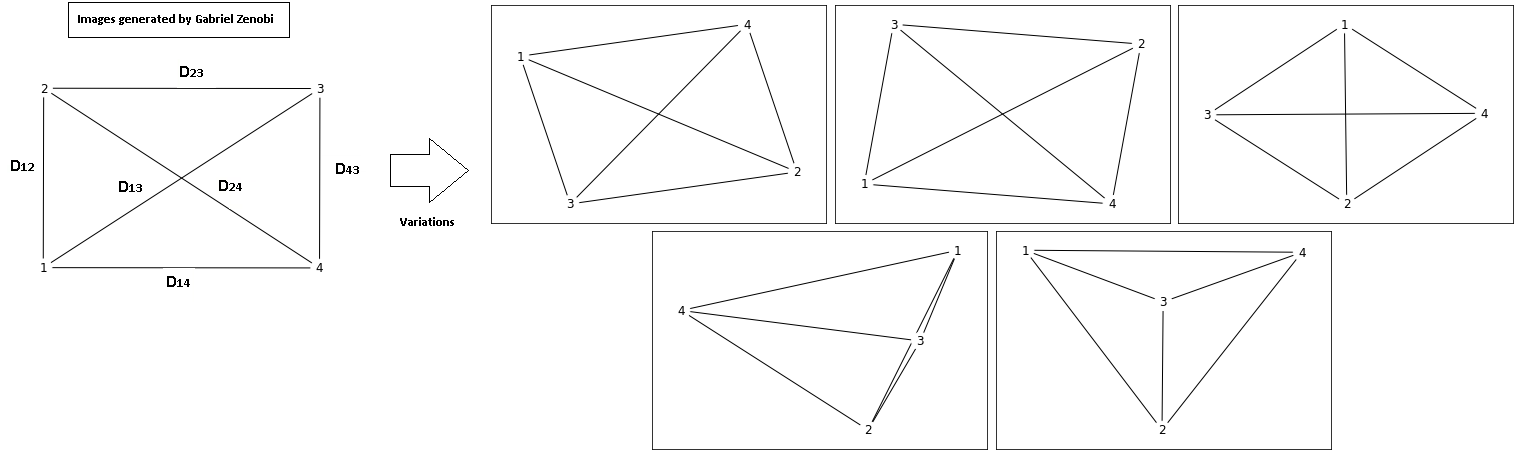

**Brute-force method** to compute the optimal route:
  1. compute the $M4x4$ distance matrix.
  2. Find all possible routes (permutations without repetition).
  3. Choose from all the routes the one with the lowest cost.

The possible routes will be determined by the formula $(N-1)!$ since the final route is not counted, and will in fact be the one that joins the last visited vertex with the selected starting point.

Giving us in this example **(4-1)! = 6** possible configurations we will only have to take the one with the lowest cost, an example of a Hamiltonian cycle could be $\{{1->4,4->2,2->3,3->1}\}$.

---

## Complexity

However, solving this problem with a brute force approach is extremely inefficient and costly in memory, as the nodes or cities in our problem increase the cost will also increase exponentially.


* Complexity of the total number of paths: $O((n-1)!)$.
* Number of operations in calculating the Euclidean distances of all paths or edges: $O(n!)$. Although symmetrically this computation can be reduced to $O(\frac{n!}{2})$ in the matrix.
* Finding the least cost path once all computations have been performed is an $O(n)$ operation.

In conclusion an exact algorithm is infeasible to implement for large instances of the problem, for example with only 20 nodes we will have a search space of $2.4329*10^{18}$ possible configurations, permutations or paths, and we do not even calculate the memory cost of maintaining an array of such magnitude.

# Local search

Local search or **LS** is a heuristic method to solve complex optimization problems, they have the characteristic of exploring a space of candidate solutions (with or without constraints, depending on the problem) applying local changes until reaching an optimal solution. Generally speaking, this family of methods does not guarantee a **global optimum**, but rather a **sub-optimum** of the problem in a reasonable time.

The idea is the following:

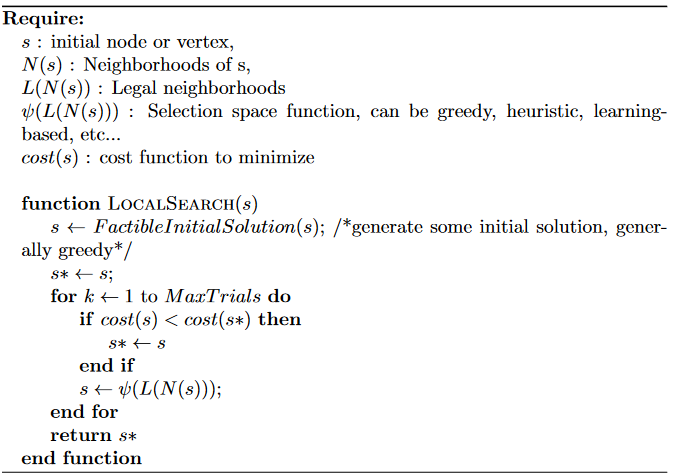

This concept also includes the notion of feasibility, i.e. that it complies with the constraints of the problem (if any), the same can be said with respect to the initial solution generated.

* Legal moves within the solution search space is $L(N(s))$.
* Selection function $\psi(L(N(s)))$, in its simplest study a greedy strategy is chosen.

# Understanding 2-opt heuristic and triangle inequality



It is a method [the mathematical properties will be described later] used to improve configurations or permutations by means of an exchange function.

The power of this heuristic is not tied only to the TSP problem, rather we can find applicability and expansion in related problems (such as those mentioned at the beginning of the article). There are also variants; 3-opt, 4-opt and in general K-opt (Lin-Kernighan heuristic) which can bring significant improvements but with a considerable trade-off in time.

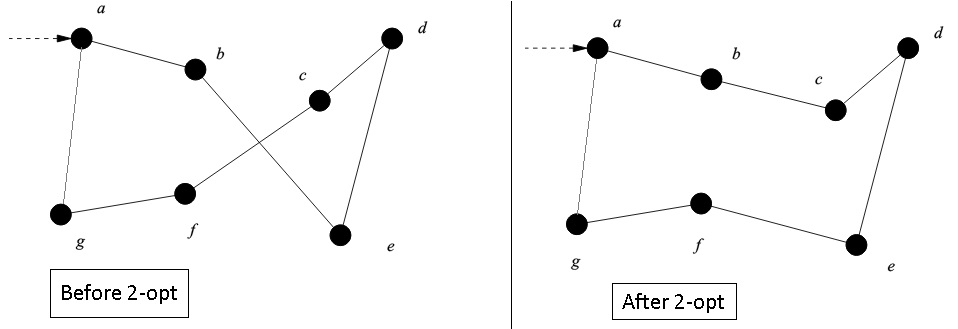

As can be seen in the schematic, 2-opt has the ability to improve the cost of a graph by swapping edges.

This does not mean that the heuristic converges to the global optimum, since as mentioned this optimum is not guaranteed so it is common to use some stopping criteria (which may include a time breach).

**Pseudocode**

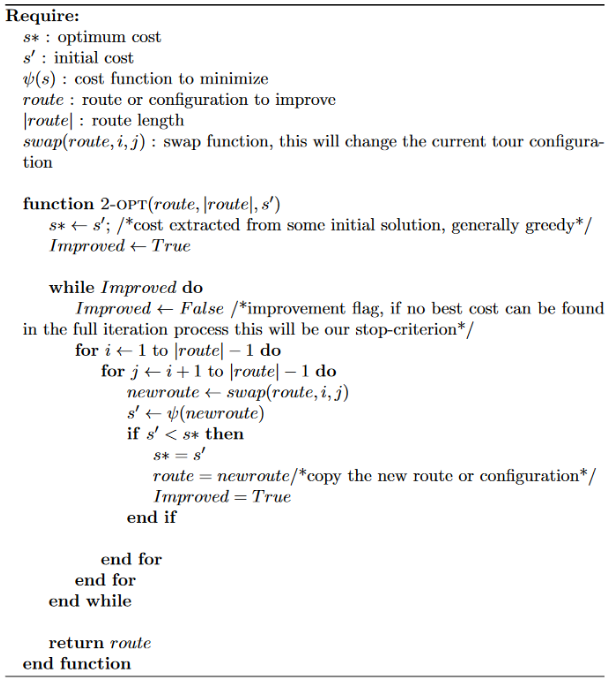

Conceptually we can start from the idea of simple hill-climbing (HC), i.e. traversing the solution space always looking for the next improvement and terminating the process when no contribution to the cost function is made.

In the HC-classical we run the risk of getting stuck in a local optimum unless we implement some metaheuristic that helps us to escape from a possible valley, peak or crest presented by the function to be optimized.

In the case of 2-opt, this problem is less common or even exclusive if we use a suitable metaheuristic, nevertheless improving a configuration by swap function is still a costly operation in terms of complexity (potentially exponential for all travels) but to an infinitely lesser extent than in an exact method, in fact the cost of each separate path is generally $O(n)$. In conclusion 2-opt is a simple heuristic to implement, very efficient and useful to find an optimum or suboptimum in a reasonable time.

**Let's see the final pseudocode for the swap function.**

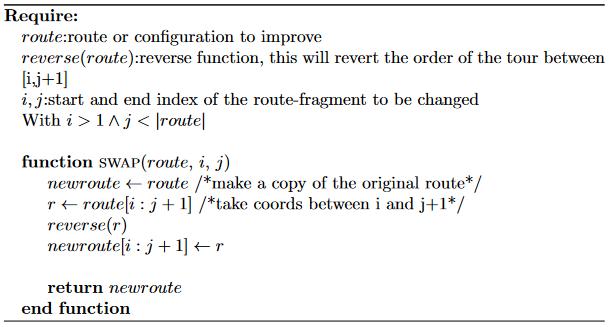

## Triangle inequality

This simple property tells us that there is a shorter path going directly from a vertex $V_i$ to a vertex $V_j$ than going through two different vertices $V_i$ ,$V_k$ to get to $V_j$. The most suitable formulation for this is:

$D_{ij} \leq D_{ik} + D_{kj}$

*where $D$ represents the Euclidean distance.*



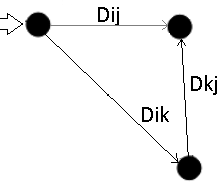

This is of utmost importance to understand the optimization mechanism of 2-opt, since this property in Euclidean metrics appears naturally for any triangle. In this way the heuristic minimizes the cost of the route by changing the edges that duplicate the route from one point to another (i.e. that force to travel to two different sides to reach the same node or vertex), this can be expressed visually when in a graph we see crossings, and these are the ones that the heuristic will "detect" and exchange for edges that do not intersect, in its most optimal form this will generate a graph that will be seen as a *simple polygon*.

# Properties: simple polygons and polygonalization

For the Euclidean $\delta-TSP$ the points in the plane form an optimal solution when the shape of the path or configuration forms a **simple polygon** through all its points.

*This means that the path does not intersect itself and has no holes, so if the sides intersect the polygon is no longer simple and we lose these properties.*

Properties of a simple polygon:
 * Each vertex is joined by only two edges.
 * The number of edges is equal to the number of vertices.
 * The line segments that make up a polygon meet at the vertices.

It follows that a local search heuristic such as 2-opt finds a least-cost path by changing the crossings of a graph to edges that form closed sides.

**Polygonalization**

A polygonalization $P$ of a finite set of points (or vertices in a graph) in the Euclidean plane forms a simple polygon.

Finding an optimal $P$-polygonalization is an extremely difficult and expensive problem since the complexity of finding all polygonalizations is unknown, and an unsolved mathematical problem. This concern to all TSP problems-like.

# Greedy Nearest neighbour(GNN) method

This method is the simplest way to solve the $\delta-TSP$ problem and although it is not heuristic, it is useful as a starting point to find a solution or initial configuration to the problem. This method under no point of view converges to a global optimum since in each iteration it looks for the short-distances between vertices or nearest neighbors (following a greedy strategy) trying all combinations, so its complexity is exponential.

The idea is very simple, **pseudocode**:

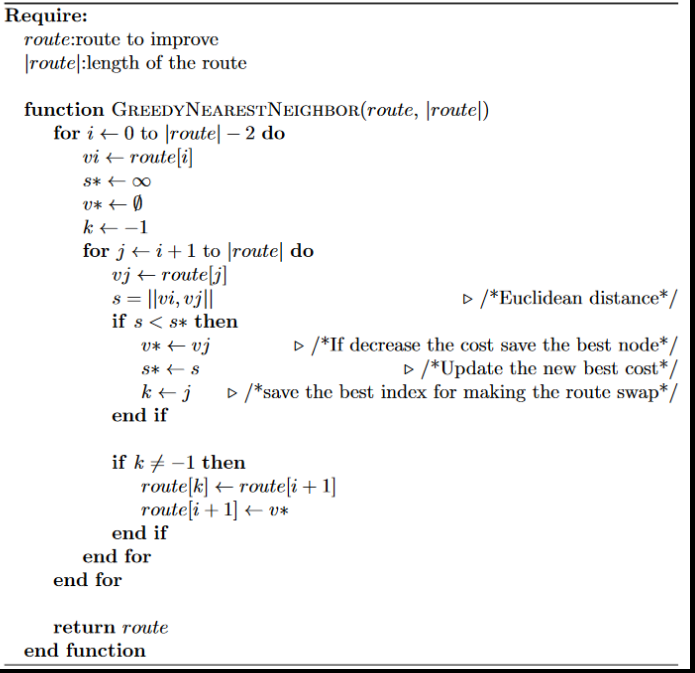

The code is quite self-explanatory, we update the path according to the distance between vertices is the shortest (and different from 0, since it would imply that $vi=vj$). It is obvious to see that the algorithm will evaluate all possibilities for each pair of vertices starting from the first one.

The optimality of my method is that we do not need to make copies of additional paths, and as the search space is traversed it will reduce exponentially until we reach the last case $O(1)$. However, in the beginning the greedy search will start at ${\{O(n!), O(n-1!), O(n-2!), ..., O(1)}\}$

# Implementing 2-opt and GNN in Cython

This is the code that I prepared in Cython, once the time complexity of the method is understood it becomes necessary to avoid pure Python at all costs as the **dynamic-binding** it performs is extremely expensive, in addition to the type checks that are done for all the objects that exist (including classes).

**gnn.pxd**

In [ ]:
cimport numpy
import numpy

cdef class greedy_nearest_neighbor:
	cdef:
		list __c_list, __best_route
	cpdef void solve(self)
	cpdef list get_best_route(self)

**gnn.pyx**

In [ ]:
cimport numpy
import numpy

cdef double dist(tuple a, tuple b):
    return numpy.hypot(a[0]-b[0],a[1]-b[1])

cdef class greedy_nearest_neighbor:
    def __cinit__(self, coords_list:list):
        self.__c_list       = coords_list
        self.__best_route   = None
        
    cpdef void solve(self):
        cdef list route
        cdef int i, j, k, n_route
        cdef double cost, best_cost
        cdef tuple v_i, v_j, best_v

        route   = self.__c_list.copy()
        n_route = len(route)
        
        for i in range(0, n_route - 2):
            v_i = route[i]

            best_cost   = numpy.inf
            best_v      = None
            k = -1
            for j in range(i+1, n_route):
                v_j = route[j]
                cost = dist(v_i, v_j)

                if cost < best_cost:
                    best_v      = v_j
                    best_cost   = cost
                    k           = j

            if k != -1:
                route[k]  = route[i+1]
                route[i+1]= best_v

        self.__best_route = route
    
    cpdef list get_best_route(self):
        return self.__best_route

Once implemented the initial solution from which we will start the 2-opt in Cython is.

**two_opt.pxd**

In [ ]:
cdef class two_opt:
	cdef:
		list __c_list, __best_route
		int splits
		double __best_cost
		
		double _cost(self, list coords_list)
		tuple _2opt_solver(self, list route, int n_route, double initial_best_cost)
		list _swap(self, list coords_list, int i, int j)

	# metodos externos
	cpdef void solve(self)
	cpdef double get_best_cost(self)
	cpdef list get_best_route(self)

**two_opt.pyx**

In [ ]:
cdef class two_opt:
    def __cinit__(self, coords_list:list, splits:int=1):
        self.__c_list       = coords_list
        self.__best_cost    = numpy.inf
        self.__best_route   = None
        self.splits         = splits

    cdef double _cost(self, list coords_list):
        cdef tuple v_prev
        cdef tuple v_next
        cdef double d

        v_prev = coords_list[0]
        d = 0
        for v_next in coords_list[1:]:
            d+= dist(v_prev, v_next)
            v_prev = v_next

        return d

    cdef list _swap(self, list coords_list, int i, int j):
        cdef list new_coords
        cdef list rev

        new_coords = coords_list.copy()
        rev = coords_list[i:j+1].copy()
        rev.reverse()
        new_coords[i:j+1] = rev

        return new_coords
        
    cdef tuple _2opt_solver(self, list route, int n_route, double initial_best_cost):
        cdef list new_route
        cdef int i, j
        cdef double best_cost, new_cost
        cdef bint improved

        best_cost = initial_best_cost

        improved = 1
        while improved:
            improved = 0
            for i in range(1, n_route):
                for j in range(i+1, n_route):
                    new_route = self._swap(route, i, j)
                    new_cost = self._cost(new_route)

                    if new_cost < best_cost:
                        best_cost   = new_cost
                        route       = new_route
                        improved    = 1

                        err = best_cost/initial_best_cost
                        print("new best cost:{}, reduced error to(%):{}".format(best_cost, numpy.round(err,4) ))

        return (route, best_cost)

    cpdef void solve(self):
        cdef int n_route
        cdef double best_cost, new_cost, initial_best_cost
        cdef list routes, route, r
        cdef int total_cost
        
        route = self.__c_list.copy()
        
        # we connect the final vertex with the initial one
        # (add to the last element of the list the first node in it...)
        route.append(route[0])
        n_route = len(route) - 1

        initial_best_cost = self._cost(route)
        print("initial cost:{}\n".format(initial_best_cost))

        route, best_cost = self._2opt_solver(route, n_route, initial_best_cost)

        self.__best_cost  = best_cost
        # we don't reconnect the last with the first node
        #self.__best_route = route[:-1]
        
        self.__best_route = route[:]

    cpdef double get_best_cost(self):
        return self.__best_cost
    cpdef list get_best_route(self):
        return self.__best_route

# My new hybrid-heuristic concept: **Splitting 2-opt heuristic**

So far we have talked about the importance of heuristics and mathematical properties with general considerations on the complexity and variation of the problem to be addressed, at this point we are already in the context of understanding the heuristic presented and how to set hyperparameters to find suboptimal solutions to giant instances of the problem.

**Splitting 2-opt** splits a very large graph into smaller parts to reduce the complexity of the search space and time. In a classical scenario we would have to explore every path for all vertices until some improvement is found and updated, but with the splitting method we take partitions ${\{G1(V1,E1), G2(V2,E2), ..., Gn(Vn,En)\}}$ of the total graph $G=(V,E)$ and reconfigure them in order to reduce such space.

*In this way we will be able to solve graphs of more than 30,000 nodes and edges in a considerable time, but with a fair loss of precision.*

**The following is an outline of the heuristic.**

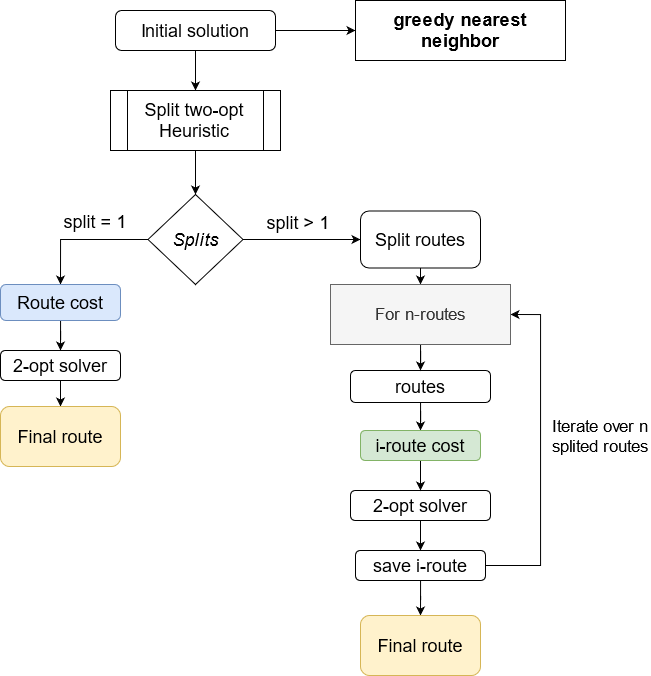

In this heuristic we will have only one hyperparameter; the number of splits.
* If Split = 1: we start from an initial route cost(total) and execute *2-opt and swap*, the new final route together with its updated cost will be determined by a single split.
* If Split > 1: we start from an initial route cost, and then run the *split routes* algorithm (which takes the number of splits as a parameter). At this point the process of cost update and *2-opt and swap* will be repeated iteratively until all the routes are optimized(separately), finally we proceed with the final solution which is the union of all the splitted routes and their full cost (the sum of all the parts).

# Splitting 2-opt Cython implementation

The following is an implementation I developed in Cython, as already discussed using pure Python is very expensive and inefficient for large instances of the problem

**split_two_opt.pxd**

In [ ]:
cimport numpy
import numpy

cdef class greedy_nearest_neighbor:
	cdef:
		list __c_list, __best_route
	cpdef void solve(self)
	cpdef list get_best_route(self)
	cpdef bint save_to_file(self, str filename)

cdef class split_two_opt:
	cdef:
		list __c_list, __best_route
		int splits
		double __best_cost
		
		double _cost(self, list coords_list)
		# =---------------------------------------------------------------
		tuple _2opt_solver(self, list route, int n_route, double initial_best_cost)
		list _split_route(self, list route, int n_route)
		# =---------------------------------------------------------------
		list _swap(self, list coords_list, int i, int j)

	cpdef void solve(self)
	cpdef double get_best_cost(self)
	cpdef list get_best_route(self)

**split_two_opt.pyx**

In [ ]:
cimport numpy
import numpy

cdef double dist(tuple a, tuple b):
    return numpy.hypot(a[0]-b[0],a[1]-b[1])

cdef class greedy_nearest_neighbor:
    def __cinit__(self, coords_list:list):
        self.__c_list       = coords_list
        self.__best_route   = None
        
    cpdef void solve(self):
        cdef list route
        cdef int i, j, k, n_route
        cdef double cost, best_cost
        cdef tuple v_i, v_j, best_v

        route   = self.__c_list.copy()
        n_route = len(route)
        
        for i in range(0, n_route - 2):
            v_i = route[i]

            best_cost   = numpy.inf
            best_v      = None
            k = -1
            for j in range(i+1, n_route):
                v_j = route[j]
                cost = dist(v_i, v_j)

                if cost < best_cost:
                    best_v      = v_j
                    best_cost   = cost
                    k           = j

            if k != -1:
                route[k]  = route[i+1]
                route[i+1]= best_v

        self.__best_route = route
    
    cpdef list get_best_route(self):
        return self.__best_route

cdef class split_two_opt:
    def __cinit__(self, coords_list:list, splits:int=1):
        self.__c_list       = coords_list
        self.__best_cost    = numpy.inf
        self.__best_route   = None
        self.splits         = splits

    cdef double _cost(self, list coords_list):
        cdef tuple v_prev
        cdef tuple v_next
        cdef double d

        v_prev = coords_list[0]
        d = 0
        for v_next in coords_list[1:]:
            d+= dist(v_prev, v_next)
            v_prev = v_next

        return d

    cdef list _swap(self, list coords_list, int i, int j):
        cdef list new_coords
        cdef list rev

        new_coords = coords_list.copy()
        rev = coords_list[i:j+1].copy()
        rev.reverse()
        new_coords[i:j+1] = rev

        return new_coords

    cdef list _split_route(self, list route, int n_route):
        cdef int n_split_size, next_split, n_route_left
        cdef list routes, split_route

        n_route_left = n_route
        n_split_size = numpy.round(n_route / self.splits,0)
        print("n_split_size: {}\n".format(n_split_size))
        routes = []
        next_split = 0
        for s in range(1, self.splits+1):
            split_route = []
            for r in range(next_split, n_split_size*s):
                n_route_left-= 1
                split_route.append(route[r])

            next_split+= n_split_size
            routes.append(split_route)

        if n_route_left > 0:
            for i in range(1, n_route_left+1):
                routes[-1].append(route[n_route-i])

        return routes

    cdef tuple _2opt_solver(self, list route, int n_route, double initial_best_cost):
        cdef list new_route
        cdef int i, j
        cdef double best_cost, new_cost
        cdef bint improved

        best_cost = initial_best_cost

        improved = 1
        while improved:
            improved = 0
            for i in range(1, n_route):
                for j in range(i+1, n_route):
                    new_route = self._swap(route, i, j)
                    new_cost = self._cost(new_route)

                    if new_cost < best_cost:
                        best_cost   = new_cost
                        route       = new_route
                        improved    = 1

                        err = best_cost/initial_best_cost
                        print("new best cost:{}, reduced error to(%):{}".format(best_cost, numpy.round(err,4) ))

        return (route, best_cost)

    cpdef void solve(self):
        cdef int n_route
        cdef double best_cost, new_cost, initial_best_cost
        cdef list routes, route, r
        cdef int total_cost
        
        route = self.__c_list.copy()

        if self.splits == 1:
            # we add to the last element of the list the first node (thus connecting the final with the begin)
            route.append(route[0])
            n_route = len(route) - 1

            initial_best_cost = self._cost(route)
            print("initial cost:{}\n".format(initial_best_cost))

            route, best_cost = self._2opt_solver(route, n_route, initial_best_cost)
        else:
            routes = self._split_route(route, len(route))

            # delete the old route, so that we can iteratively rebuild it.
            route.clear()
            s = 1
            for r in routes:
                n_route = len(r) - 1
                initial_best_cost = self._cost(r)
                #print("route({})={}, length:{}, initial best cost:{}".format(i,r,n_route,initial_best_cost))

                print("[!] {}-split maked".format(s))
                new_route, new_best_cost = self._2opt_solver(r, n_route, initial_best_cost)

                # we add the splits of the new best routes
                for r_ in new_route: route.append(r_)

                s+= 1
                print("")

            # we add to the last element of the list the first node (thus connecting the final with the begin)
            route.append( self.__c_list[0] )
            # new best cost
            best_cost = self._cost(route)
            print("\n")
        
        self.__best_cost  = best_cost
        # we do not reconnect the last node with the first one
        #self.__best_route = route[:-1]
        # reconnect the last node with the first one
        self.__best_route = route[:]

    cpdef double get_best_cost(self):
        return self.__best_cost
    cpdef list get_best_route(self):
        return self.__best_route

# Proof: solving a graph(circuit) with more than 30000 nodes

As a final test let us optimize a graph which represents some electronic circuit, the file was proposed by Professor Pascal Van Hentenryck of the University of Melbourne. 

**The execution of the 2-opt splitting heuristic was performed with the following hyperparameter.**

In [ ]:
def greedy_and_split_two_opt_solver(coords_list:list, splits:int)->tuple:
    gnn = two_opt.greedy_nearest_neighbor(coords_list)
    gnn.solve()
    new_route = gnn.get_best_route()

    opt2 = two_opt.split_two_opt(new_route,splits=90)
    opt2.solve()
    new_route = opt2.get_best_route()
    new_cost  = opt2.get_best_cost()

    return (new_route, new_cost)

*The reported result was as follows.*

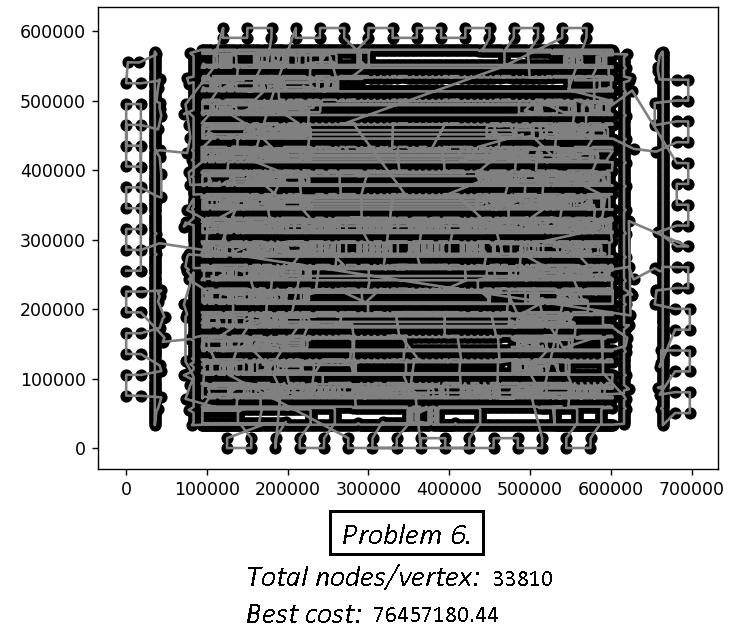

The final output value is: **76457180.44**